# Zoom ML homework wk3

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc

In [18]:
df = pd.read_csv(r'.\bank\bank-full.csv', delimiter=';')

In [19]:
features = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day',\
            'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

df = df[features]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [21]:
numerical = list(df.dtypes[df.dtypes != 'object'].index)

In [22]:
# checchange y to numeric values
df['y'] = (df['y'] == 'yes').astype(int)

In [23]:
#y is object so, change the y to numeric before we selelct categorical
# features
categorical = list(df.dtypes[df.dtypes == 'object'].index)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 5.2+ MB


In [25]:
print(numerical)
print(categorical)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']


### Split the data
```
Split your data in train/val/test sets with 60%/20%/20% distribution.
Use Scikit-Learn for that (the train_test_split function) and set the seed to 1.

In [26]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

In [30]:
print(len(df), len(df_train), len(df_val), len(df_test))
print(len(df_train)+len(df_val)+len(df_test))

45211 27126 9042 9043
45211


In [31]:
len(df_train)+len(df_val)+len(df_test)

45211

# Question 1: ROC AUC feature importance
```
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

For each numerical variable, use it as score (aka prediction) and compute the AUC with the y variable as ground truth.
Use the training dataset for that
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['engine_hp'])

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?
```

In [32]:
from sklearn.metrics import roc_auc_score

y = df_train['y']
h_score = 0.0
h_feature = ''
for feature in  numerical:   
    y_pred = df_train[feature]
    if feature == 'y':
        continue
    score = roc_auc_score(y, y_pred)
    if score < 0.5:
        score = roc_auc_score(y, -y_pred)
    
    if score > h_score:
        h_score = score
        h_feature = feature
    print(f'feature: {feature}, score:{score}')


feature: age, score:0.512185717527344
feature: balance, score:0.5888313805382317
feature: day, score:0.525957882383908
feature: duration, score:0.8147002759670778
feature: campaign, score:0.5714543015682159
feature: pdays, score:0.5901276247352144
feature: previous, score:0.5985653242764153


Q1 Answer

In [33]:
print(f'feature: {h_feature}, highest score: {h_score}')

feature: duration, highest score: 0.8147002759670778


# Question 2
```
Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
What's the AUC of this model on the validation dataset? (round to 3 digits)

0.69
0.79
0.89
0.99
```

In [34]:
y_train = df_train.y.values
y_val = df_val.y.values

del df_train['y']
del df_val['y']

train_dict = df_train[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [35]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [36]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)


In [37]:
y_pred = model.predict_proba(X_val)[:, 1]

In [38]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

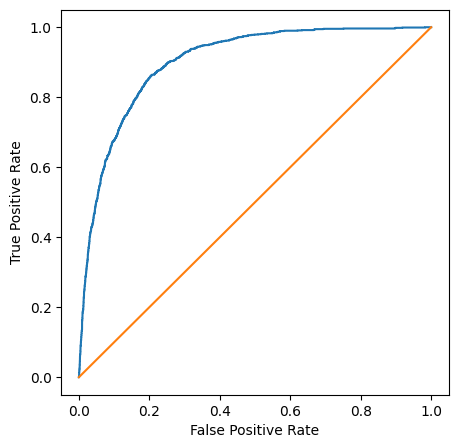

In [42]:
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plot the ideal 
plt.plot([0, 1], [0, 1])

In [43]:
roc_auc_score(y_val, y_pred)

np.float64(0.9006884713944792)

Question 3: 
```
Precision and Recall
Now let's compute precision and recall for our model.

Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
For each threshold, compute precision and recall
Plot them
At which threshold precision and recall curves intersect?

0.265
0.465
0.665
0.865
```

```
In cases where no positive predictions are made (TP + FP = 0), there is no False Positive or True Positive to calculate precision. In this case, setting precision to 1 can be seen as a way to indicate that the classifier is perfectly precise, in the sense that it did not make any incorrect positive predictions. This is what scikit-learn does in its precision_recall_curve.
```

In [60]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        tp = ((y_pred >= t) & (y_val == 1)).sum()
        fp = ((y_pred >= t) & (y_val == 0)).sum()
        fn = ((y_pred < t) & (y_val == 1)).sum()
        tn = ((y_pred < t) & (y_val == 0)).sum()

        scores.append((t, tp, fp, fn, tn))

    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    #this cause nan when divide by zero , callsifier is perfect
    #df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
    # Set precision to 1 when tp + fp = 0 (no positive predictions)
    df_scores['precision'] = df_scores.apply(lambda row: row.tp / (row.tp + row.fp)\
                                              if (row.tp + row.fp) > 0 else 1, axis=1)
    df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)

    return df_scores

In [59]:

thresholds = np.linspace(0, 1, 101)
len(thresholds)

101

In [61]:
np.random.seed(1)

df_thre_var = tpr_fpr_dataframe(y_val, y_pred)
#df_thre_var[::10]
df_thre_var.tail()


,threshold,tp,fp,fn,tn,tpr,fpr,precision,recall
96,0.96,30,17,1068,7927,0.027322,0.002140,0.638298,0.027322
97,0.97,25,14,1073,7930,0.022769,0.001762,0.641026,0.022769
98,0.98,20,10,1078,7934,0.018215,0.001259,0.666667,0.018215
99,0.99,9,5,1089,7939,0.008197,0.000629,0.642857,0.008197
100,1.00,0,0,1098,7944,0.000000,0.000000,1.000000,0.000000


Text(0, 0.5, 'probability')

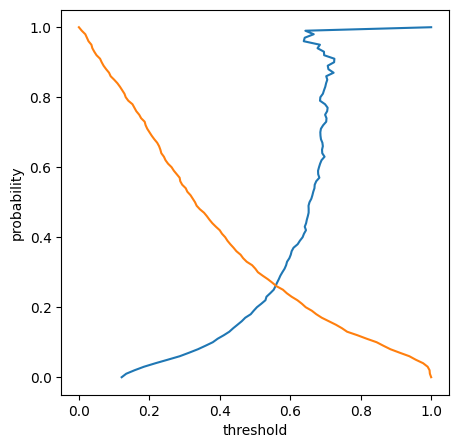

In [70]:
plt.figure(figsize=(5, 5))
plt.plot(df_thre_var['precision'] , df_thre_var['threshold'])
plt.plot(df_thre_var['recall'] , df_thre_var['threshold'])

plt.xlabel('threshold')
plt.ylabel('probability')
#plot the ideal 
#plt.plot([0, 1], [0, 1])

Calaculate F1

In [69]:
def f1(p,r):
        return (2*p*r)/(p+r)
df_thre_var['f1'] =  0.0
df_thre_var['f1'] = df_thre_var.apply(lambda x: f1(x['precision'], x['recall']), axis=1)

#get max f1
f1_max = df_thre_var['f1'].max()
print('Q4: Answer')
threshold_max = df_thre_var[df_thre_var['f1'] == f1_max]['threshold'].tolist()[0]
print('Threshold when F1 is max: ', threshold_max)


Q4: Answer
Threshold when F1 is max:  0.22


#Question 5: 5-Fold CV
```
Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)
Iterate over different folds of df_full_train
Split the data into train and validation
Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
Use AUC to evaluate the model on validation
How large is standard deviation of the scores across different folds?
```

In [71]:
from sklearn.model_selection import KFold

In [72]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [ ]:
def train(df_train):
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    

In [73]:
df_train_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36168 entries, 22468 to 33003
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        36168 non-null  int64 
 1   job        36168 non-null  object
 2   marital    36168 non-null  object
 3   education  36168 non-null  object
 4   balance    36168 non-null  int64 
 5   housing    36168 non-null  object
 6   contact    36168 non-null  object
 7   day        36168 non-null  int64 
 8   month      36168 non-null  object
 9   duration   36168 non-null  int64 
 10  campaign   36168 non-null  int64 
 11  pdays      36168 non-null  int64 
 12  previous   36168 non-null  int64 
 13  poutcome   36168 non-null  object
 14  y          36168 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 4.4+ MB


In [78]:
def train(df, y, c=1.0, max_iter=1000):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=c, max_iter=max_iter)
    model.fit(X, y)

    return dv, model


def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(cat)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [79]:
aucs = []

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    y_train = df_train.y.values

    df_val = df_train_full.iloc[val_idx]
    y_val = df_val.y.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    rocauc = roc_auc_score(y_val, y_pred)
    aucs.append(rocauc)

In [80]:
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

auc = 0.906 ± 0.006


#Question 6: Hyperparameter Tuning

```
Now let's use 5-Fold cross-validation to find the best parameter C

Iterate over the following C values: [0.000001, 0.001, 1]
Initialize KFold with the same parameters as previously
Use these parameters for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
Compute the mean score as well as the std (round the mean and std to 3 decimal digits)
Which C leads to the best mean score?
```

In [84]:
nfolds = 5
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)

for C in [0.000001, 0.001, 1]:
    aucs = []

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.y.values
        y_val = df_val.y.values

        dv, model = train(df_train, y_train, c=C)
        y_pred = predict(df_val, dv, model)
        
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)

    print('C=%s, auc = %0.3f ± %0.3f' % (C, round(np.mean(aucs), 5), np.std(aucs)))

C=1e-06, auc = 0.701 ± 0.009
C=0.001, auc = 0.861 ± 0.007
C=1, auc = 0.906 ± 0.006
